In [2]:
import snap
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def q2_1(G):
    '''
    Node 33 appears to be an assistant teacher. Node 33 has the highest node after node 34 within
    the sub-community of 34's club. It would make sense then that 33 is 34's assistant within this
    sub club.
    '''
    nx.draw(G, with_labels=True)
    plt.savefig('karate_graph')
    plt.show()

In [4]:
def q2_2():
    '''
    When p and q = 1, all nodes will have uniform transition probabilities.
    '''
    pass

In [5]:
def euclidean_distance(X, Y):
    return np.sqrt(((X - Y) ** 2).sum())

def top_k(filename, CId, K):
    Embeddings = []
    ToCompare = None
    with open(filename, 'r') as f:
        heading = f.readline().strip().split()
        for line in f:
            line = line.strip().split()
            NId, Embedding = int(line[0]), [float(n) for n in line[1:]]
            if NId == CId: ToCompare = np.array(Embedding)
            Embeddings.append((Embedding, NId))
    Embeddings = np.array(Embeddings)
    RankedDistances = sorted([(euclidean_distance(ToCompare, E), NId, E) for E, NId in Embeddings])[1:K+1]
    for i, (_, NId, _) in enumerate(RankedDistances):
        print '{}. {}'.format(i+1, NId)

def q2_3():
    '''
    I set p=1 and q=5. This means that the random walk will act like BFS, thus nodes in the same neiborhood
    will have similar embeddings because they will have similar BFS structure. Thus the embeddings learned
    for nodes in the same neighborhood will be similar, so we can use the L2 norm to find the nodes closest
    to node 33, which should be close to 33 by path length.
    
    Another way to think about it is that the random walk is going to stick around nodes in a neighborhood
    because the transition probability to nodes 2+ steps away is quite low. This will help ensure that
    the embeddings learned for each node is representative of its local neighborhood, which means that embeddings
    of nodes that are connected by short path lengths should have similar embeddings and thus be close by
    the L2 norm.
    '''
    print 'Closest By Path Length:'
    top_k('../emb/karate.emd', 33, 5)

def q2_4():
    '''
    DFS should give similar structure. Set p=1 and q=0.01
    '''
    print 'Closest By Degree:'
    top_k('../emb/karate_deg.emd', 34, 5)
    
def q2_5(G):
    '''
    This seems to make sense. The parameter settings mean that the random walk is likely to hit nodes that
    are two steps away. Node 33 and node 10 are both connected to node 34 but not to each other, meaning that
    these nodes will likely hit node 34 and then each other during the random walk, giving us reason to
    believe that 33 and 10 would have similar embeddings under this setting. This means that a random walk
    under this setting will likely show us that the closest node is one of the nodes two steps away from 33.
    
    They are both connected to 34 but not each other. 34 has a high degree, so a DFS search
    (which these parameters cause) will create similar embeddings for 33 and 10 because the
    DFS on the graph will be very similar.
    '''
    print 'Closest To 33 by L2:'
    top_k('../emb/karate_neighborhood.emd', 33, 1)
    print 'Degree of 33:', G.degree(33)
    print 'Degree of 10:', G.degree(10)

In [6]:
def Q2():
    G = nx.Graph()
    with open('../graph/karate.edgelist', 'r') as f:
        for line in f:
            E1, E2 = line.strip().split()
            G.add_edge(int(E1), int(E2))
    print 'Q2.1:'
    q2_1(G)
    print '\n'
    print 'Q2.2'
    q2_2()
    print '\n'
    print 'Q2.3'
    q2_3()
    print '\n'
    print 'Q2.4'
    print G.degree()
    q2_4()
    print '\n'
    print 'Q2.5'
    q2_5(G)

Q2.1:


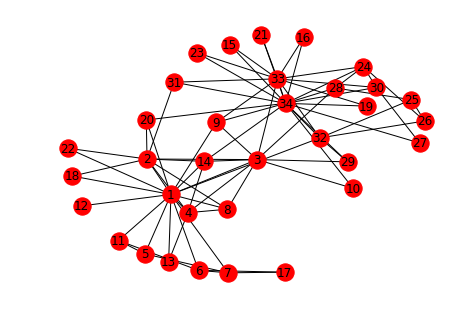



Q2.2


Q2.3
Closest By Path Length:
1. 34
2. 19
3. 15
4. 23
5. 21


Q2.4
{1: 16, 2: 9, 3: 10, 4: 6, 5: 3, 6: 4, 7: 4, 8: 4, 9: 4, 10: 2, 11: 3, 12: 1, 13: 2, 14: 5, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 3, 21: 2, 22: 2, 23: 2, 24: 5, 25: 3, 26: 3, 27: 2, 28: 4, 29: 3, 30: 4, 31: 3, 32: 6, 33: 12, 34: 17}
Closest By Degree:
1. 24
2. 25
3. 29
4. 33
5. 30


Q2.5
Closest To 33 by L2:
1. 10
Degree of 33: 12
Degree of 10: 2


In [53]:
if __name__ == '__main__':
    Q2()